In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import techniques

In [2]:
x = np.arange(start = -3, stop = 3, step = 0.01) 
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.5, size = x.shape[0])

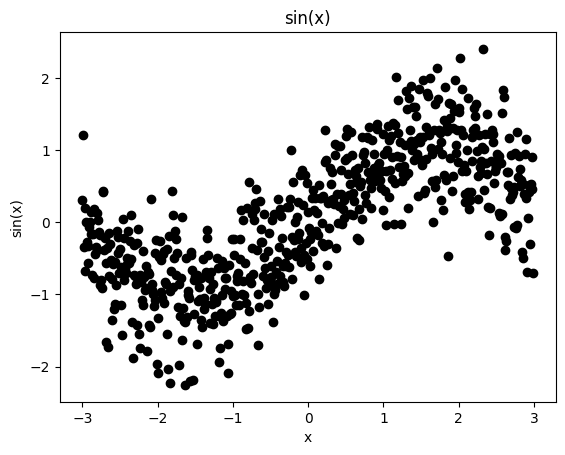

In [3]:
plt.scatter(x, y, color = 'black')
plt.title("sin(x)")
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [4]:
p_n = 6
keep_val = np.arange(start = 0.45, stop = 0.99, step = 0.1)
best_keep, lowest_MSE, arr_ret = techniques.grid_searchCV_pruning(xin = x, yin = y, p = p_n, keep_rate = keep_val, CV_groups = 20, classification = False)

The model with lowest MSE is : 0.5486901104580834
The model parameters with lowest MSE is using keep_rate : 0.7500000000000001


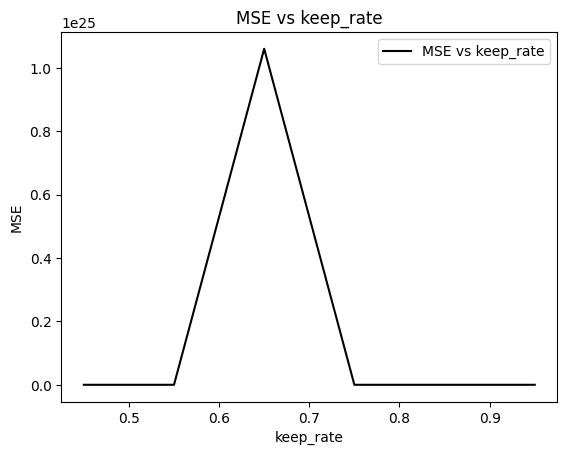

In [5]:
x_plot = np.arange(start = 0.45, stop = keep_val[keep_val.shape[0] -1] + 0.01, step = 0.1)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs keep_rate')
plt.title('MSE vs keep_rate')
plt.xlabel('keep_rate')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [6]:
ret = techniques.train_ELM_PRUNING(xin = x, yin = y, p = p_n, control = True, keep_rate = best_keep)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [7]:
best_w

array([[ 0.07806183],
       [ 0.42099922],
       [ 0.04059499],
       [ 0.        ],
       [ 0.18358405],
       [-0.14517804],
       [ 0.        ]])

In [8]:
xrange = np.linspace(start = -3, stop = 3, num = 100)
y_net = techniques.test_ELM(xin = xrange, Z = best_z, W = best_w, control = True, classification = False)

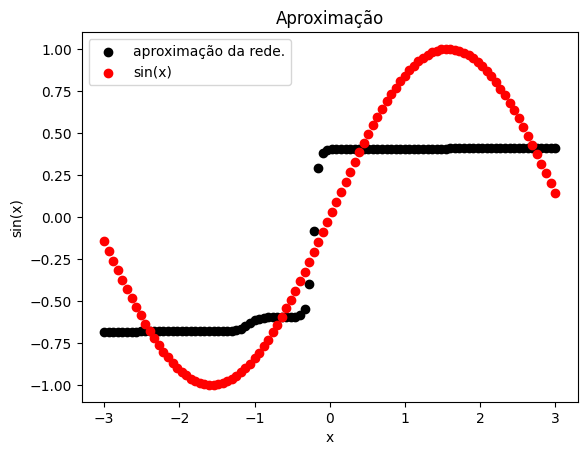

In [9]:
plt.scatter(xrange, y_net, color = 'black', label = 'aproximação da rede.')
plt.scatter(xrange, np.sin(xrange) , color = 'red', label = 'sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Aproximação')
plt.legend()
plt.show()